In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

mnist = tf.keras.datasets.mnist

(X_full_train, y_full_train), (X_test, y_test) = mnist.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_full_train, y_full_train, test_size=5000)

In [ ]:
import numpy as np

def check_features(X):
    print("Shape:", X.shape)
    print("Data type:", X.dtype)
    print("Min value:", np.min(X))
    print("Max value:", np.max(X))
    print("Mean:", np.mean(X))
    print("Std deviation:", np.std(X))

    # Check if image-like data
    if X.ndim == 4:
        print("Looks like image data: (samples, height, width, channels)")
    elif X.ndim == 3:
        print("Looks like grayscale images: (samples, height, width)")
    elif X.ndim == 2:
        print("Looks like tabular data: (samples, features)")
    else:
        print("Unexpected shape for X.")

check_features(X_train)

Shape: (55000, 28, 28)
Data type: uint8
Min value: 0
Max value: 255
Mean: 33.322900788497215
Std deviation: 78.570861065643
Looks like grayscale images: (samples, height, width)


In [ ]:
import numpy as np

def check_labels(y):
    if y.ndim == 1 or (y.ndim == 2 and y.shape[1] == 1):
        print("Labels are sparse (integers).")
        print("Classes:", np.unique(y))
        print("Number of classes:", len(np.unique(y)))
    elif y.ndim == 2:
        print("Labels are one-hot encoded.")
        print("Number of classes:", y.shape[1])
    else:
        print("Unexpected label format.")

check_labels(y_train)

Labels are sparse (integers).
Classes: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


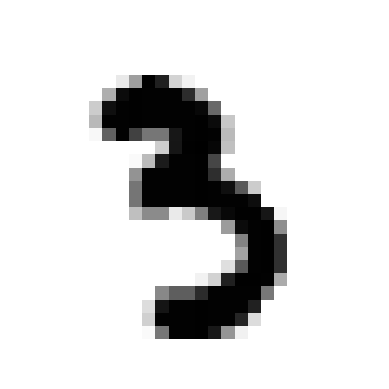

In [ ]:
import matplotlib.pyplot as plt

# Let's look at a sample image
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
# Preprocessing data
import tensorflow as tf

BATCH_SIZE = 32
IMG_HEIGHT, IMG_WIDTH, CHANNELS = 28, 28, 1
NUM_CLASSES = 10 # 10 classes for MNIST

# Create tf.data.Dataset from NumPy arrays
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_ds   = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
test_ds  = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Helper function for preprocessing
def format_image(image, label):
    # Reshape, convert to float32, normalize
    image = tf.reshape(image, [IMG_HEIGHT, IMG_WIDTH, CHANNELS])
    image = tf.cast(image, tf.float32) / 255.0
    # One-hot encode the labels
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label


train_ds = (train_ds.map(format_image).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE))
val_ds = (val_ds.map(format_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE))
test_ds = (test_ds.map(format_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE))

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=5)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 54s 30ms/step - accuracy: 0.8674 - loss: 0.4176 - val_accuracy: 0.9724 - val_loss: 0.0866
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - accuracy: 0.9757 - loss: 0.0767 - val_accuracy: 0.9792 - val_loss: 0.0652
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9844 - loss: 0.0518 - val_accuracy: 0.9856 - val_loss: 0.0497
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9869 - loss: 0.0415 - val_accuracy: 0.9870 - val_loss: 0.0468
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9906 - loss: 0.0301 - val_accuracy: 0.9850 - val_loss: 0.0558


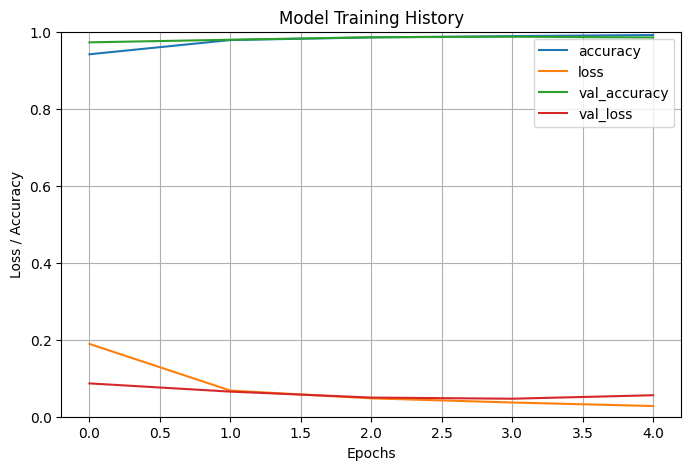

In [ ]:
# EVALUATE AND VISUALIZE PERFORMANCE

# Plotting the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set the vertical range to [0-1]
plt.title("Model Training History")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.legend(loc='best')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


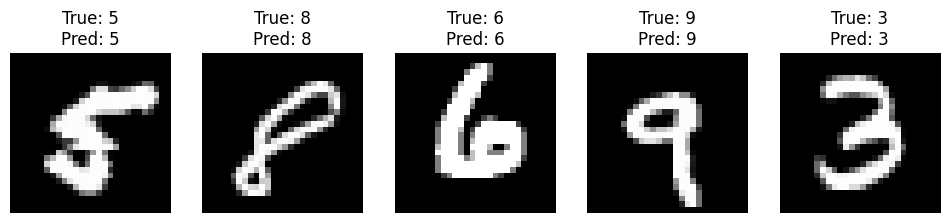

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Class names for MNIST digits
class_names = [str(i) for i in range(10)]

# Pick a batch from validation set
for images, labels in val_ds.take(1):  # just one batch
    # Pick 5 random samples from the batch
    idx = np.random.choice(range(images.shape[0]), size=5, replace=False)
    sample_images = tf.gather(images, idx)
    sample_labels = tf.gather(labels, idx)

    # Make predictions
    preds = model.predict(sample_images)
    preds = np.argmax(preds, axis=1)   # get the predicted digit (0–9)
    true_labels = np.argmax(sample_labels.numpy(), axis=1)  # if labels are one-hot encoded

    # Plot results
    plt.figure(figsize=(12, 6))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(sample_images[i].numpy().squeeze(), cmap="gray")  # remove channel dim for plotting
        plt.axis("off")
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[preds[i]]}")
    plt.show()
